In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

In [2]:
auto_mpg = fetch_ucirepo(id=9)
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [3]:
cf_x = ['displacement', 'horsepower', 'weight', 'acceleration']
cf_y = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df = X[cf_x].copy()
df['mpg'] = y['mpg']


In [4]:
missing = [f for f in cf_y if f not in df.columns]
if missing:
    print(f"Error: Missing features {missing}")
    exit()

In [5]:
df.fillna(df.mean(), inplace=True)

In [6]:
df_original = df.copy()

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df = pd.DataFrame(X_scaled, columns=cf_y)

In [8]:
hc = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
df['CLUSTERS'] = hc.fit_predict(X_scaled)
df['origin'] = X['origin']

In [9]:
print("\nCluster Stats (Mean, Var):")
print(df.groupby('CLUSTERS')[cf_y].agg(['mean', 'var']))

print("\nOrigin Stats (Mean, Var):")
print(df.groupby('origin')[cf_y].agg(['mean', 'var']))


Cluster Stats (Mean, Var):
               mpg           displacement           horsepower            \
              mean       var         mean       var       mean       var   
CLUSTERS                                                                   
0        -0.471690  0.323792    -0.471242  0.202864  -0.439845  0.418150   
1         1.484507  0.192671     1.502830  0.463119   1.387534  0.270986   
2        -0.976350  0.001130    -1.453937  0.002748  -0.989238  0.030297   

            weight           acceleration            
              mean       var         mean       var  
CLUSTERS                                             
0         0.311340  0.642682     0.341124  0.677814  
1        -1.062679  0.420519    -1.151105  0.078296  
2         2.652985  0.304409     2.585833  0.004923  

Origin Stats (Mean, Var):
             mpg           displacement           horsepower            \
            mean       var         mean       var       mean       var   
origin          

In [17]:
print(y.columns) 

Index(['mpg'], dtype='object')


In [35]:
df_original['CLUSTERS'] = hc.fit_predict(X_scaled)
df_original['origin'] = X['origin']

In [37]:
print("\nCluster Stats (Mean, Var):")
print(df_original.groupby('CLUSTERS')[cf_y].agg(['mean', 'var']))


Cluster Stats (Mean, Var):
                mpg            displacement               horsepower  \
               mean        var         mean          var        mean   
CLUSTERS                                                               
0         26.177441  41.303375   144.304714  3511.485383   86.490964   
1         14.528866   4.771033   348.020619  2089.499570  161.804124   
2         43.700000   0.300000    91.750000    12.250000   49.000000   

                           weight                acceleration            
                 var         mean            var         mean       var  
CLUSTERS                                                                 
0         295.270673  2598.414141  299118.709664    16.425589  4.875221  
1         674.075816  4143.969072  193847.051117    12.641237  3.189948  
2           4.000000  2133.750000   21672.916667    22.875000  2.309167  


In [39]:
print("\nOrigin Stats (Mean, Var):")
print(df_original.groupby('origin')[cf_y].agg(['mean', 'var']))


Origin Stats (Mean, Var):
              mpg            displacement               horsepower  \
             mean        var         mean          var        mean   
origin                                                               
1       20.083534  40.997026   245.901606  9702.612255  118.814769   
2       27.891429  45.211230   109.142857   509.950311   81.241983   
3       30.450633  37.088685   102.708861   535.465433   79.835443   

                          weight                acceleration            
                var         mean            var         mean       var  
origin                                                                  
1       1569.532304  3361.931727  631695.128385    15.033735  7.568615  
2        410.659789  2423.300000  240142.328986    16.787143  9.276209  
3        317.523856  2221.227848  102718.485881    16.172152  3.821779  


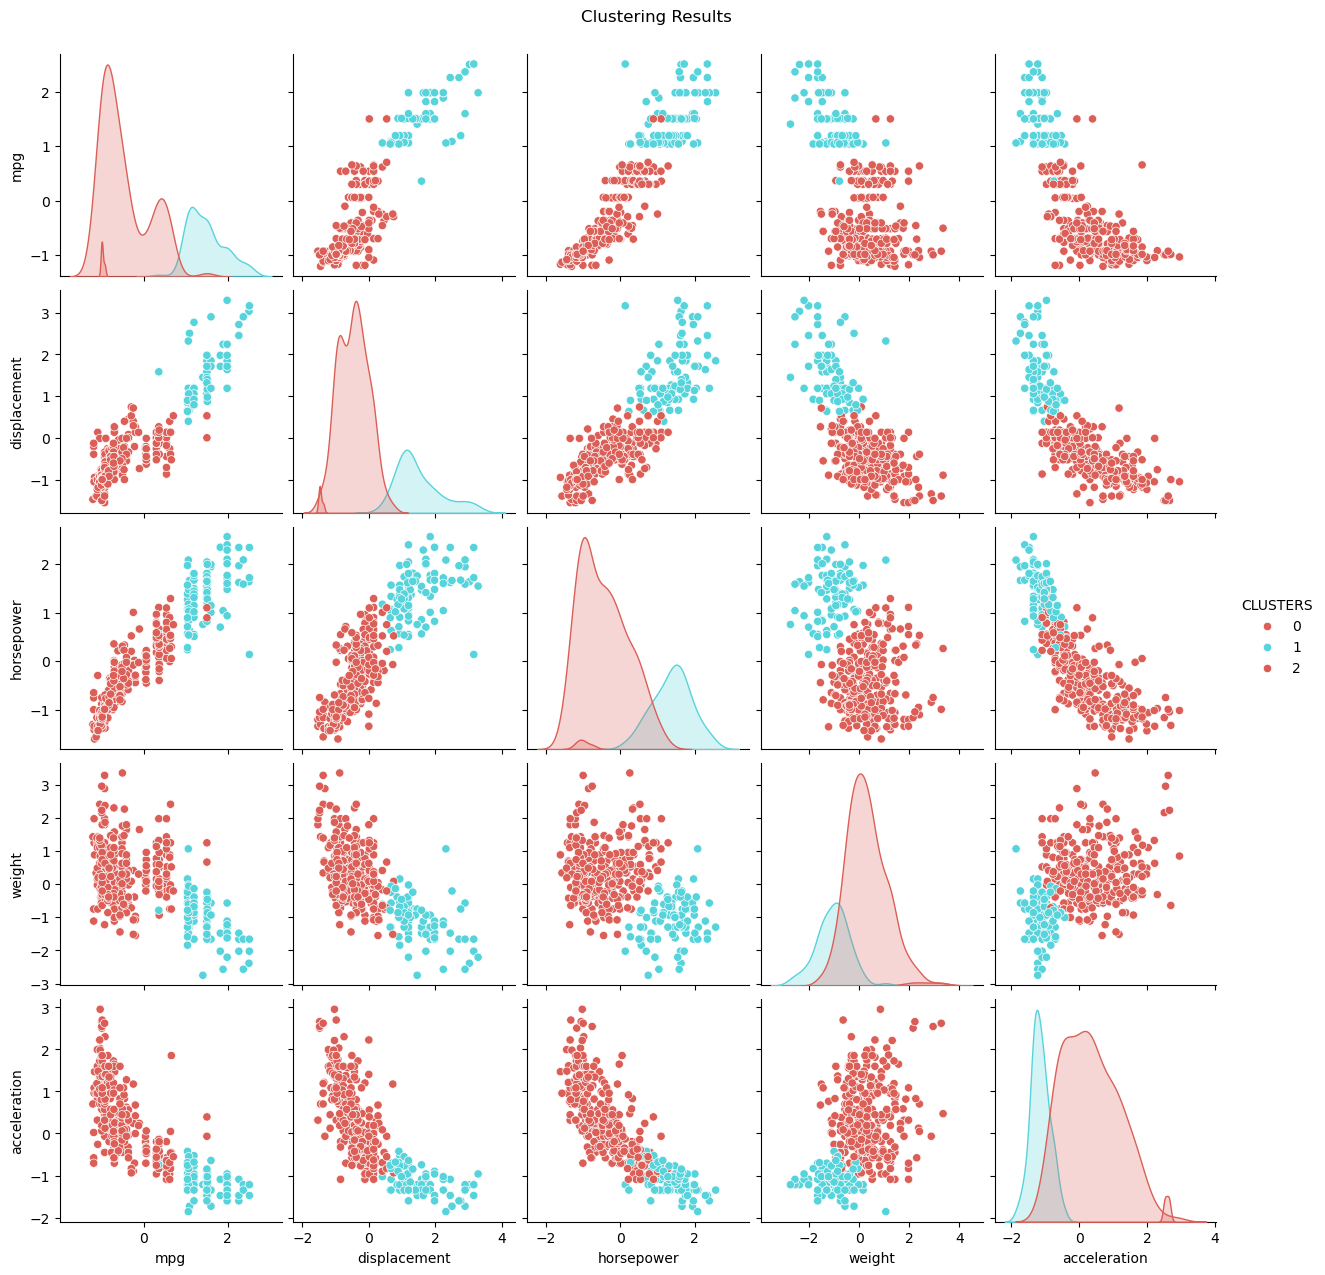

In [29]:
# Visualize clusters
sns.pairplot(df, vars=cf_y, hue='CLUSTERS', palette='hls')
plt.suptitle('Clustering Results', y=1.02)
plt.savefig(r'D:\桌面\数据挖掘\clustering_results.png')
plt.show()


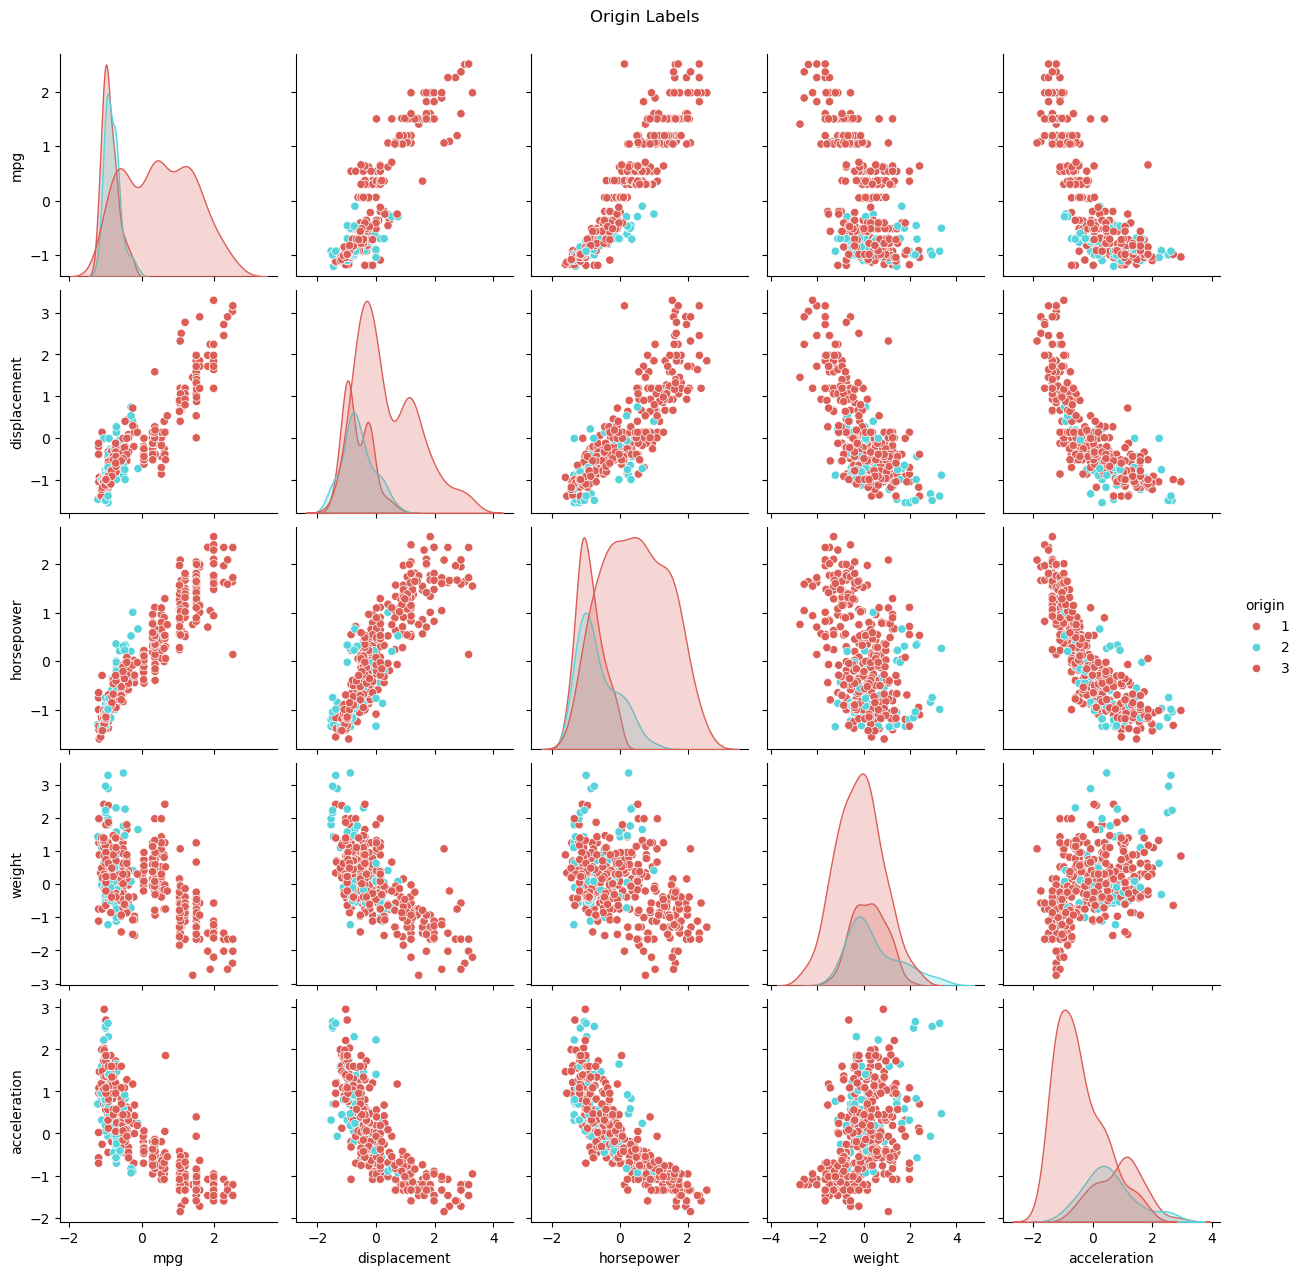

In [30]:
# Visualize origin
sns.pairplot(df, vars=cf_y, hue='origin', palette='hls')
plt.suptitle('Origin Labels', y=1.02)
plt.savefig(r'D:\桌面\数据挖掘\origin_labels.png')
plt.show()


In [31]:
# Analyze cluster vs origin
print("\nCluster vs Origin Crosstab:")
print(pd.crosstab(df['CLUSTERS'], df['origin']))
print("\nDiscussion: Check if clusters align with origin distribution.")


Cluster vs Origin Crosstab:
origin      1   2   3
CLUSTERS             
0         152  66  79
1          97   0   0
2           0   4   0

Discussion: Check if clusters align with origin distribution.
